# Microsoft Movies Analysis: Exploring Trends, Insights and Recommendations

![Microsoft Movies Analysis.png](<attachment:Microsoft Movies Analysis.png>)

## Overview

Microsoft, a renowned technology and software corporation valued at approximately $2.33 trillion, is considering expanding its operations into the film industry. With its dominance in the computer sector, Microsoft has made a name for itself through products such as the Windows operating system, popular software like Microsoft Office, and the Edge internet browser. Additionally, the company has successfully entered the gaming realm with its Xbox gaming studio, which produces the world's second most popular gaming console and a multitude of highly acclaimed games. As we navigate the digital age, Microsoft remains at the forefront of technological advancements.

In line with their pursuit of excellence across various sectors, this proposal aims to assess the feasibility of Microsoft's foray into movie making.

## Statement of the Problem

In order for Microsoft to make a successful entry into the movie industry, it is crucial to approach this venture with the same level of strategic thinking and business acumen that has propelled the company's success thus far. This requires addressing two key aspects: the financial viability of movie production and the ability to create compelling and popular films that resonate with audiences. Achieving success in both areas will ensure that Microsoft not only generates profits but also establishes dominance in the sector.

To determine the economic potential of the movie industry, thorough market research and analysis are essential. This includes assessing current industry trends, box office revenues, and consumer spending patterns related to film consumption. By understanding the market dynamics, Microsoft can gauge the potential for substantial profits and make informed decisions about resource allocation.

Creating popular movies requires a deep understanding of audience preferences and the ability to deliver captivating storytelling. To achieve this, Microsoft should focus on market research, audience segmentation, and trend analysis to identify what resonates with viewers. Collaborating with experienced filmmakers, writers, and industry professionals can also provide valuable insights and enhance the creative process. By investing in high-quality productions with compelling narratives, engaging characters, and innovative storytelling techniques, Microsoft can increase the likelihood of producing successful and commercially viable films.

Ultimately, by combining a sound understanding of the industry's economic potential with a commitment to creating high-quality and audience-focused content, Microsoft can position itself as a formidable player in the movie-making business, further enhancing the company's value and expanding its dominance across sectors.

##  Data Understanding
Data for this undertaking was sourced from the following independently run websites:
  1. <a href="https://www.the-numbers.com/">The Numbers</a>
  2. <a href="https://www.boxofficemojo.com/">BoxOfficeMojo</a>
  3. <a href="https://www.rottentomatoes.com/">RottenTomatoes</a>
  4. <a href="https://www.themoviedb.org/">TheMovieDB</a>
  5. <a href="https://www.imdb.com/">IMDB</a>
  
These sites have a wide variety of particulars all concerning movies for an extended period. This data includes things like domestic gross, worldwide gross, year of release and popularity measures of a movie from both professional critics and the average movie-goer. All this is data that can help make an informed decision.

Importation of all the neccesary python libraries marks the commencement:

In [1]:
# imports

import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The data files were opened to gain a preliminary understanding of their contents and structure, providing insights into the datasets and their potential relevance in achieving stated objectives. By examining the data frames, available information can be assessed to determine how it can contribute to the goal. This initial exploration allows for familiarization with the data, enabling for making of informed decisions on how to utilize it effectively to address research questions and drive towards desired outcomes.

In [2]:
# Opening The Numbers data file

numbers_df = pd.read_csv("data/tn.movie_budgets.csv")
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


The Numbers data provides valuable insights into movie profits by including both earnings and production costs. Additionally, the dataset includes release dates, enabling analysis over time.

In [3]:
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# Checking for missing values

numbers_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Absence of missing values ensures the integrity of the data, minimizing any potential impact.

In [5]:
# Opening BoxOfficeMojo data file

mojo_df = pd.read_csv("data/bom.movie_gross.csv")
mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
# Checking for missing values

mojo_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

BoxOfficeMojo dataset also includes studio information, allowing us to analyze the performance of different studios, potentially including Microsoft's competition. However, it is worth noting that the dataset contains numerous missing values in the foreign_gross column, and some data types may require adjustments to facilitate our desired operations.

In [8]:
# Opening Rotten Tomatoes data file

tomatoes_df = pd.read_csv("data/rt.movie_info.tsv", delimiter = '\t')
tomatoes_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [9]:
tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [10]:
# Checking for missing values

tomatoes_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Rotten Tomatoes dataset provides extensive information on movie genres, writers, and directors. However, it appears to have significant missing data in the money-related columns, which could limit our business understanding. On a positive note, the dataset includes the studio column and runtime, which offers insights into movie studios and the duration of films.

In [11]:
# Opening TheMovieDB data file

tmdb_df = pd.read_csv("data/tmdb.movies.csv")
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
# Checking for missing values

tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

TheMovieDB dataset contains a popularity column, determined by user ratings, which provides a straightforward measure of how well a movie was received by its audience. Additionally, the dataset includes information about the movie's language, release date, and other relevant details.

## Data Preparation

### Data Cleaning

#### The Numbers

In [14]:
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


There is need to convert the datatype above to integers for smooth carrying out of mathematical operations. `production_budget`, `domestic_gross` and `worldwide_gross` columns have characters that are not integers ('$' and ','), which will affect the conversion.

In [15]:
# Removing ',' and '$' in the mentioned columns

numbers_df['production_budget'] = numbers_df['production_budget'].str.replace(',','').str.replace('$','')
numbers_df['domestic_gross'] = numbers_df['domestic_gross'].str.replace(',','').str.replace('$','')
numbers_df['worldwide_gross'] = numbers_df['worldwide_gross'].str.replace(',','').str.replace('$','')
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


Now, the columns have clean numbers that can be converted to integers.

In [16]:
# Converting the three columns from object to integers

numbers_df = numbers_df.astype({'production_budget':'int64','domestic_gross':'int64', 'worldwide_gross':float})


# Checking for confirmation

numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 271.2+ KB


Mathematical operations on the columns can now be carried out.

A new column `total_gross` which represents the total amount of money the movie earned should be made.

In [17]:
# New column of total_gross

numbers_df['total_gross'] = numbers_df['domestic_gross'] + numbers_df['worldwide_gross']
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.936903e+09
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,2.889770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,2.676000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,0.000000e+00


With total gross of each movie and the cost of production, `profit` can be calculated.

In [18]:
# Making a profit column

numbers_df['profit'] = numbers_df['total_gross'] - numbers_df['production_budget']
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.936903e+09,1.619903e+09
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,2.889770e+05,2.829770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,2.676000e+03,-2.324000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,0.000000e+00,-1.400000e+03


There is need to compare numbers of each movie on an yearly basis. To do this a column containing the year of release rather than `release_date`, which combines date,month and year, is made

In [19]:
# Separeting release_date column into month, date and year, respectively

numbers_df['month'] = pd.to_datetime(numbers_df['release_date'], format='%b %d, %Y').dt.month
numbers_df['date'] = pd.to_datetime(numbers_df['release_date'], format='%b %d, %Y').dt.day
numbers_df['year'] = pd.to_datetime(numbers_df['release_date'], format='%b %d, %Y').dt.year
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,month,date,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,3.536853e+09,3.111853e+09,12,18,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,1.286728e+09,8.761278e+08,5,20,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,1.925247e+08,-1.574753e+08,6,7,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.862020e+09,1.531420e+09,5,1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.936903e+09,1.619903e+09,12,15,2017
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000e+00,-7.000000e+03,12,31,2018
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,2.889770e+05,2.829770e+05,4,2,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,2.676000e+03,-2.324000e+03,7,13,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,0.000000e+00,-1.400000e+03,9,29,2015


A smaller dataframe with just the relevant columns should be made. 

These columns are:
 * `production_budget`
 * `profit`
 * `year`

In [20]:
# Making smaller dataframe

prod_profit_df = numbers_df[['movie','production_budget','profit','year']]
prod_profit_df

,movie,production_budget,profit,year
0,Avatar,425000000,3.111853e+09,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,8.761278e+08,2011
2,Dark Phoenix,350000000,-1.574753e+08,2019
3,Avengers: Age of Ultron,330600000,1.531420e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,1.619903e+09,2017
...,...,...,...,...
5777,Red 11,7000,-7.000000e+03,2018
5778,Following,6000,2.829770e+05,1999
5779,Return to the Land of Wonders,5000,-2.324000e+03,2005
5780,A Plague So Pleasant,1400,-1.400000e+03,2015


This dataframe is ready for analysis. Moving on to cleaning the next data set.

#### Box Office Mojo

In [21]:
mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Again some of the columns, `foreign_gross`, contain characters that would hinder mathematical calculations. That can be fixed and converted to float.

In [22]:
# Removing any non-numerical characters from column
mojo_df['foreign_gross'] = mojo_df['foreign_gross'].str.replace(',','') 


# Changing data type to float
mojo_df['foreign_gross'] = mojo_df['foreign_gross'].astype(float)


# Checking for confirmation
mojo_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Proceeding to check for missing values.

In [23]:
mojo_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

For `studio` and `foreign_gross` the number of missing values is very small to be droppedwithout impacting the data.

For `foreign gross`, the number is significantly high. Howerver, those movies with NaN were not released internationally thus did not have any earnings. The assumption is that their earnings are $0.

In [24]:
# Dropping 'Nan' rows in studio and domestic gross column
mojo_df = mojo_df.dropna(subset=['studio'])
mojo_df = mojo_df.dropna(subset=['domestic_gross'])

# Checking for confirmation
mojo_df.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

The rest of the data featuring will be done in the analysis stage.

#### Rotten Tomatoes

In [25]:
tomatoes_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [26]:
tomatoes_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

For `tomatoes_df`, `year` and `genre` columns are essential for analysis. They need to be modified.

The `theater_date` column starts off - by separating the values so that the year can be worked with.

In [27]:
# Separating month, date and year into individual columns

tomatoes_df['month'] = pd.to_datetime(tomatoes_df['theater_date'], format='%b %d, %Y').dt.month
tomatoes_df['date'] = pd.to_datetime(tomatoes_df['theater_date'], format='%b %d, %Y').dt.day
tomatoes_df['year'] = pd.to_datetime(tomatoes_df['theater_date'], format='%b %d, %Y').dt.year
tomatoes_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,month,date,year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,10.0,9.0,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,8.0,17.0,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,9.0,13.0,1996.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,12.0,9.0,1994.0
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,8.0,18.0,2006.0
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage,7.0,23.0,1993.0
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN,1.0,1.0,1962.0
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN,4.0,1.0,1993.0


In [28]:
# Checking for missing values

tomatoes_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
month            359
date             359
year             359
dtype: int64

Missing values in `year` are a low enough to be dropped without significantly impacting the data.

In [29]:
# Dropping missing values from year column
tomatoes_df = tomatoes_df.dropna(subset=['year'])

# Checking for confirmation
tomatoes_df.isna().sum()

id                0
synopsis          3
rating            0
genre             0
director        118
writer          263
theater_date      0
dvd_date          0
currency        867
box_office      867
runtime           7
studio          737
month             0
date              0
year              0
dtype: int64

In [30]:
# Changing the Dtypes of new columns so they look like actual dates and not decimal numbers

tomatoes_df = tomatoes_df.astype({'month':int, 'date':int,'year':int})
tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1559
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1201 non-null   int64 
 1   synopsis      1198 non-null   object
 2   rating        1201 non-null   object
 3   genre         1201 non-null   object
 4   director      1083 non-null   object
 5   writer        938 non-null    object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      334 non-null    object
 9   box_office    334 non-null    object
 10  runtime       1194 non-null   object
 11  studio        464 non-null    object
 12  month         1201 non-null   int32 
 13  date          1201 non-null   int32 
 14  year          1201 non-null   int32 
dtypes: int32(3), int64(1), object(11)
memory usage: 136.1+ KB


`tomatoes_df` is ready for analysis.

#### TheMovieDB

In [31]:
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [32]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The data set is already good shape, save for the date format. Individual date, month and year should be separated for ease of work.

In [33]:
# Changing the format of the column to date time
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Separating into individual columns
tmdb_df['year'] = tmdb_df['release_date'].dt.year
tmdb_df['month'] = tmdb_df['release_date'].dt.month
tmdb_df['day'] = tmdb_df['release_date'].dt.day
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,day
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,26
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5,7
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11,22
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10,13
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,5,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,10,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,6,22


Behold! All the data sets are ready for analysis.

## Statistical Analysis and Modelling

### The Numbers

In [34]:
prod_profit_df['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [35]:
prod_profit_df['year'].value_counts()

year
2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1937      1
1927      1
1947      1
1958      1
1920      1
Name: count, Length: 96, dtype: int64

First, we look at the average cost of production of movies. This will give a good gauge to Microsoft on how much they would have to spend to make a movie. A histogram and box plot are made to show the distribution of budgets.

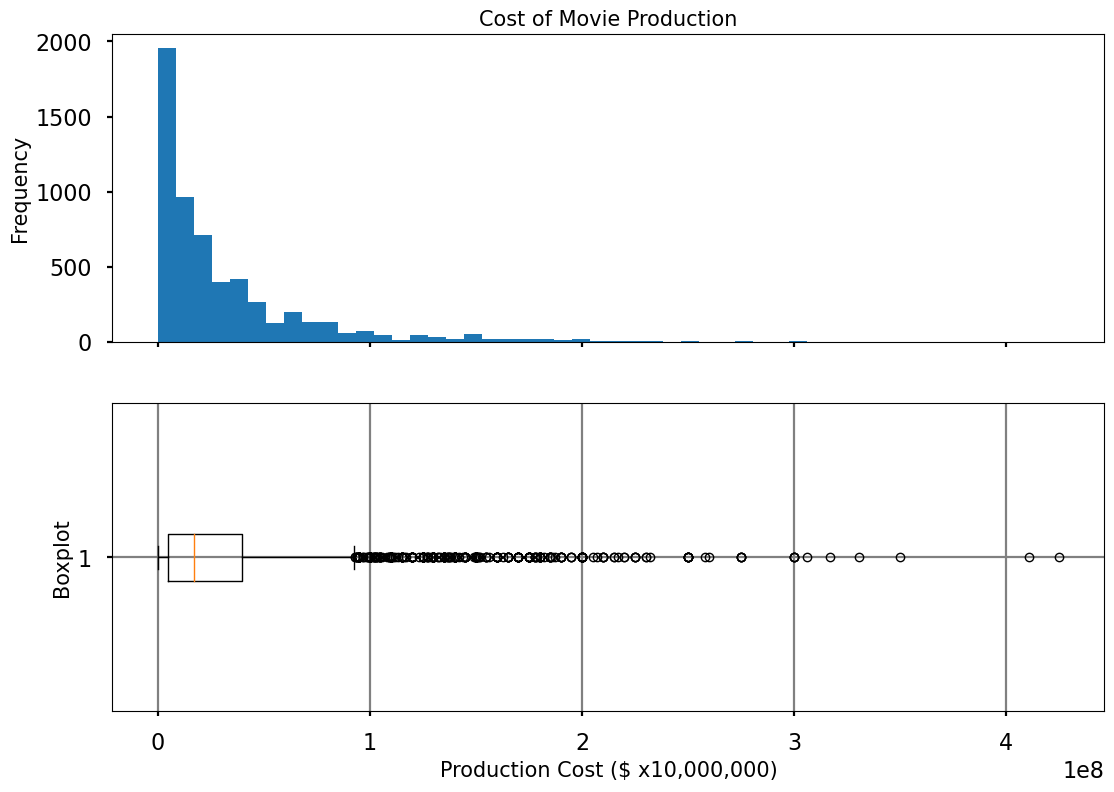

In [36]:
plt.style.use('seaborn-v0_8-poster')

# Creating histogram
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (1, 1)})

ax1.set_title('Cost of Movie Production', fontsize=15)
ax1.hist(prod_profit_df['production_budget'], bins=50)
ax1.set_ylabel('Frequency', fontsize=15)

# Creating box plot
ax2.boxplot(prod_profit_df['production_budget'], vert=False)
ax2.set_xlabel('Production Cost ($ x10,000,000)',fontsize=15)
ax2.set_ylabel('Boxplot', fontsize=15)

plt.grid(True, color='gray')

plt.show()


It costs around 31.5 million dollars to produce one movie. Though there is a massive number of outliers as shown in the boxplot most movies cost around this figure.

Worth noting is dates back to the 1940s. A lot has changed since then in terms of movie production. There is a need to limit the data to the start of this century - barely enough time period for extremely large changes to happen in the industry.

In [37]:
# Limiting the data to the start of the century

recent_prod_profit_df = prod_profit_df[prod_profit_df['year']>2003]
recent_prod_profit_df

,movie,production_budget,profit,year
0,Avatar,425000000,3.111853e+09,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,8.761278e+08,2011
2,Dark Phoenix,350000000,-1.574753e+08,2019
3,Avengers: Age of Ultron,330600000,1.531420e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,1.619903e+09,2017
...,...,...,...,...
5776,The Mongol King,7000,-5.200000e+03,2004
5777,Red 11,7000,-7.000000e+03,2018
5779,Return to the Land of Wonders,5000,-2.324000e+03,2005
5780,A Plague So Pleasant,1400,-1.400000e+03,2015


Now for the profits that the movies made.

In [38]:
# Sorting the dataframe by year

groupby_year = recent_prod_profit_df.groupby('year')[['production_budget', 'profit']].sum()
groupby_year

,production_budget,profit
year,,
2004,7268301975,2.020789e+10
2005,7443094182,1.849584e+10
2006,7492669000,1.981333e+10
2007,7319501000,1.996472e+10
2008,8377546890,2.250492e+10
2009,8511345000,2.595766e+10
2010,9141605650,2.510948e+10
2011,8952952300,2.551777e+10
2012,8487135173,2.922176e+10


In [39]:
# Checking the statistics

groupby_year.describe()

,production_budget,profit
count,1.700000e+01,1.700000e+01
mean,7.445111e+09,2.288622e+10
std,2.272630e+09,8.632803e+09
min,2.820000e+08,-2.820000e+08
25%,7.319501e+09,1.996472e+10
50%,8.377547e+09,2.551777e+10
75%,8.842179e+09,2.922176e+10
max,9.141606e+09,3.083774e+10


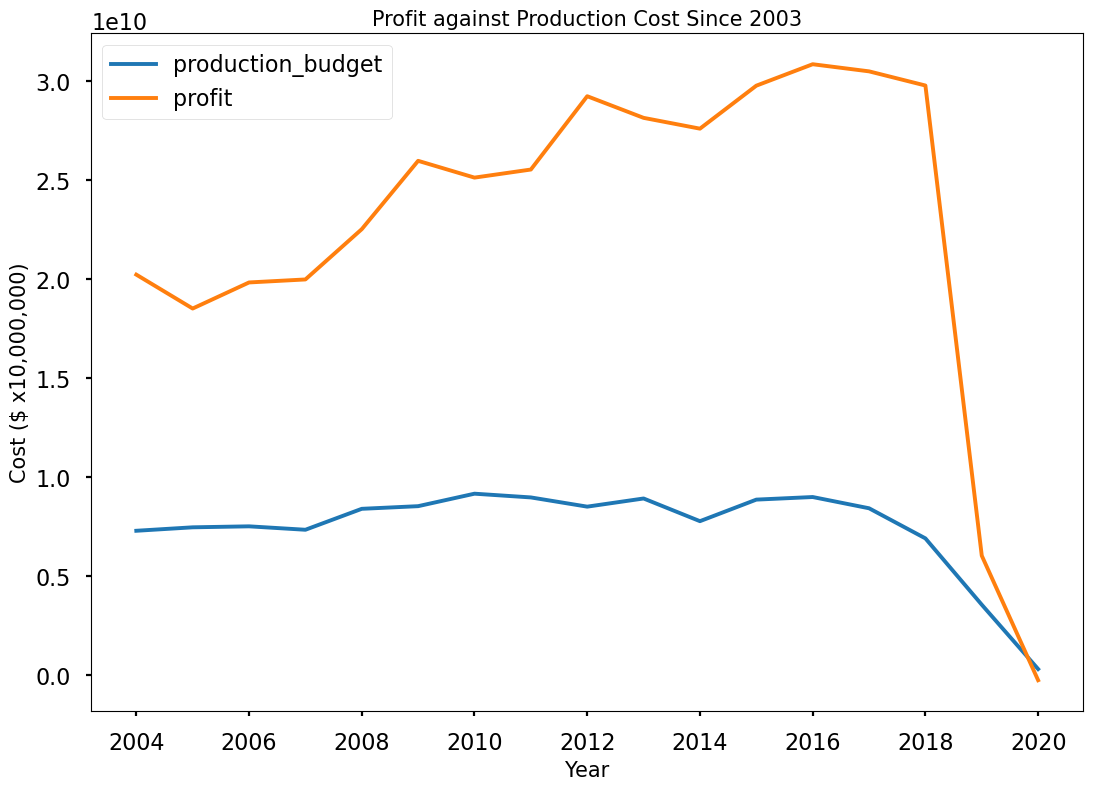

In [40]:
# Plotting with the newly-modified dataframe
plt.style.use('seaborn-v0_8-poster')
groupby_year.plot()

plt.title('Profit against Production Cost Since 2003', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Cost ($ x10,000,000)', fontsize=15);

# Display the plot
plt.show()

From the graph above, it is evident that profits made are higher than the cost of production for a large number of the movies produced in the last 20 years. The trend would have continued had it not been for the Covid-19 pandemic in 2020. 

The average profit is $22 billion dollars

Safe to say that this is an industry with a lots of money to be made.

Profits over the years in a bar graph were plotted to give a concrete visualization and added a line to show the average cost of production.

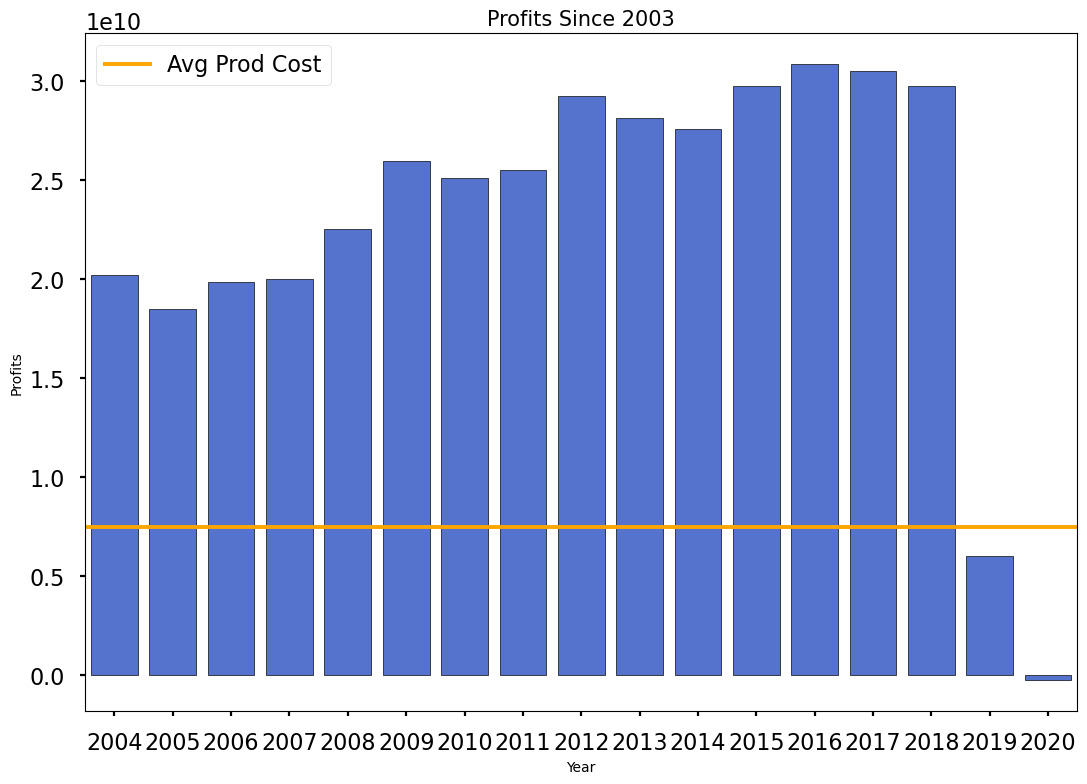

In [41]:
from matplotlib.lines import Line2D

plt.style.use('seaborn-v0_8-poster')

# Bar graph plot
sns.barplot(data=groupby_year.reset_index(), x='year', y='profit', color = 'royalblue', edgecolor='black')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Profits', fontsize=10)
plt.title('Profits Since 2003', fontsize=15)


# Plot a line representing the average cost of production
plt.axhline(y=7.445111e+09, color='orange')
dummy_line = Line2D([0], [0], color='orange', linestyle='-')
plt.legend(handles=[dummy_line],loc='upper left', labels=['Avg Prod Cost'])


plt.show()

This graph further confirms how much profit there is to be made in movie making as there was a general increase in profits over the years up until the Covid-19 pandemic. So as the industry picks itself back up, Microsoft will have a better chance to start on fair ground.

Thus in conclusion, **there is money to be made in movie making**.

#### Box Office Mojo

For this data set, analysing the top studios is made, since that is Microsoft's aim.

The data had a lot of missing values in the `foreign_gross` column thus a need to take a look at some sample lines that contain NaN values.

In [42]:
mojo_df[mojo_df.isnull().any(axis=1)]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


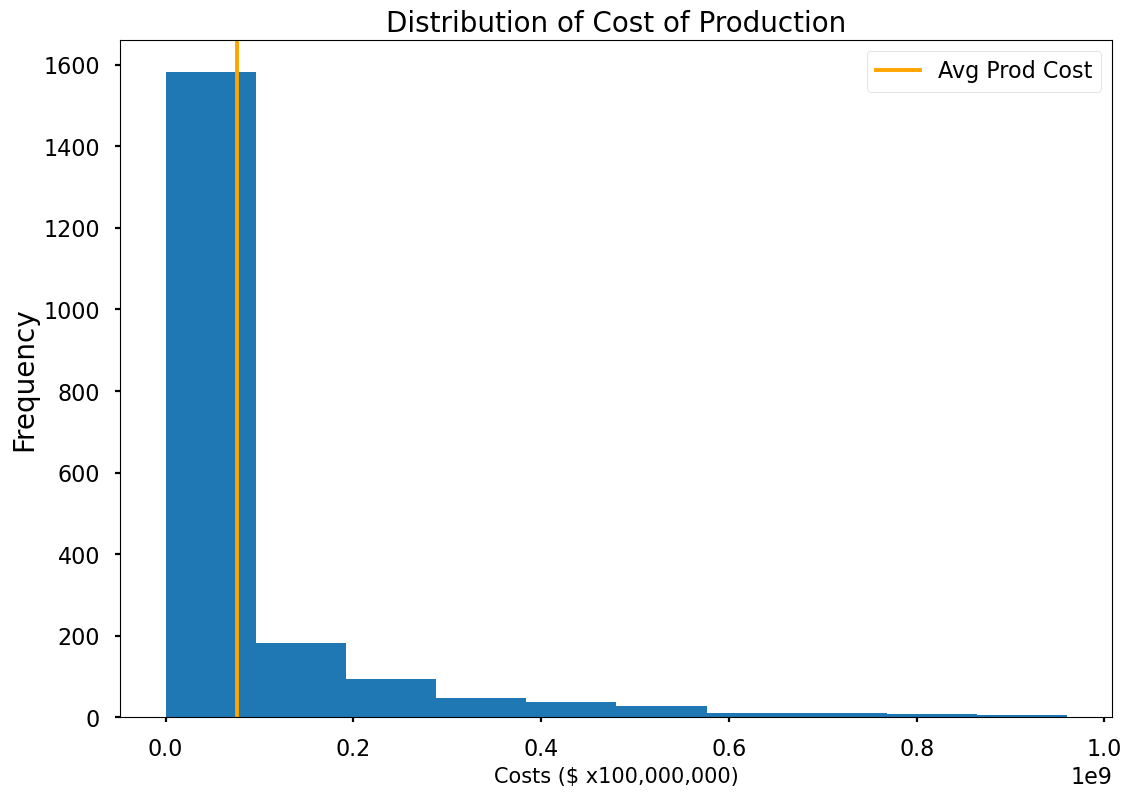

In [43]:
# Creating plot
mojo_df['foreign_gross'].plot.hist()

plt.xlabel('Costs ($ x100,000,000)', fontsize=15)
plt.ylabel('Frequency', fontsize=20)
plt.title('Distribution of Cost of Production', fontsize=20)

# Plotting average cost of production
plt.axvline(x=7.579038e+07, color='orange')
dummy_line = Line2D([0], [0], color='orange', linestyle='-')
plt.legend(handles=[dummy_line],loc='upper right', labels=['Avg Prod Cost'])


Now, to replace the NaN values with '0' and see how it affects the graph above.

In [44]:
# Equating to new dataframe
mojo2_df = mojo_df

# Replacing NaN with 0
mojo2_df['foreign_gross'].fillna(0, inplace=True)
mojo2_df.describe()

,domestic_gross,foreign_gross,year
count,3.356000e+03,3.356000e+03,3356.000000
mean,2.877149e+07,4.532518e+07,2013.970203
std,6.700694e+07,1.131263e+08,2.479064
min,1.000000e+02,0.000000e+00,2010.000000
25%,1.200000e+05,0.000000e+00,2012.000000
50%,1.400000e+06,1.400000e+06,2014.000000
75%,2.795000e+07,2.970000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


The mean has reduced.

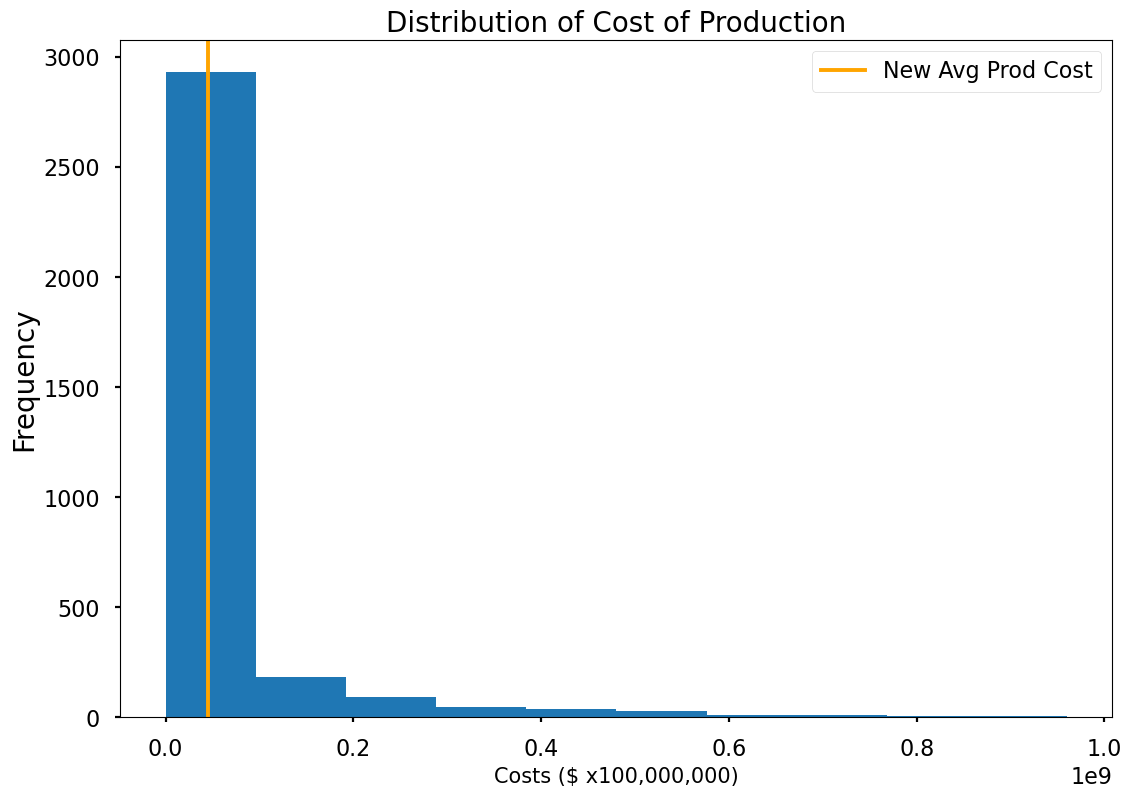

In [45]:
# Creating Plot
mojo_df['foreign_gross'].plot.hist(bins=10)
plt.xlabel('Costs ($ x100,000,000)', fontsize=15)
plt.ylabel('Frequency', fontsize=20)
plt.title('Distribution of Cost of Production', fontsize=20)

# Plot the new average cost of production
plt.axvline(x=4.532518e+07, color='orange')
dummy_line = Line2D([0], [0], color='orange', linestyle='-')
plt.legend(handles=[dummy_line],loc='upper right', labels=['New Avg Prod Cost'])

The mean has shifted to the left which is to be expected since a lot of movies with the value **0** in `foreign_gross` were added.

Now to know the total earnings that each movie made by summing both local and foreign earnings

In [46]:
# Making a new column with the total earnings

mojo2_df['total_gross'] = mojo2_df['domestic_gross'] + mojo2_df['foreign_gross']
mojo2_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


This is good data, we'll use it to look at the number of unique studios that are there or at least the top 20 most common studios.

In [47]:
# Checking top 20 most recurring studios
mojo2_df['studio'].value_counts().sort_values(ascending=False).head(20)

studio
IFC       166
Uni.      147
WB        140
Magn.     136
Fox       136
SPC       123
Sony      109
BV        106
LGF       102
Par.      101
Eros       89
Wein.      77
CL         73
Strand     68
FoxS       66
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: count, dtype: int64

There seems to be some studios that have more than one name. They should be combined as one.

These studios are:
 - WB (NL) to WB
 - LG/S to LGF
 - FoxS to Fox

In [48]:
# Merging the studios into one
mojo2_df['studio'].replace('WB (NL)','WB', inplace=True)
mojo2_df['studio'].replace('LG/S','LGF', inplace=True)
mojo2_df['studio'].replace('FoxS','Fox', inplace=True)

# Check for confirmation
mojo2_df['studio'].value_counts().sort_values(ascending=False).head(20)

studio
Fox       202
WB        185
IFC       166
Uni.      147
LGF       143
Magn.     136
SPC       123
Sony      109
BV        106
Par.      101
Eros       89
Wein.      77
CL         73
Strand     68
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
MBox       54
Name: count, dtype: int64

Now, the top 10 studios, in terms of money earned.

In [49]:
# Making a new dataframe with just the top 10 studios sorted by total gross

top_10 = mojo2_df.groupby('studio').sum().sort_values('total_gross', ascending=False).head(10)
top_10

,title,domestic_gross,foreign_gross,year,total_gross
studio,,,,,
BV,Toy Story 3Alice in Wonderland (2010)TangledTr...,1.841903e+10,2.579385e+10,213451,4.421288e+10
WB,Harry Potter and the Deathly Hallows Part 1Inc...,1.616375e+10,2.500690e+10,372585,4.117065e+10
Fox,The Chronicles of Narnia: The Voyage of the Da...,1.201133e+10,2.154845e+10,406775,3.355979e+10
Uni.,Despicable MeRobin HoodLittle FockersThe Wolfm...,1.290239e+10,1.685477e+10,296082,2.975716e+10
Sony,The Karate KidSaltThe TouristGrown UpsThe Soci...,8.459683e+09,1.394524e+10,219565,2.240492e+10
Par.,Iron Man 2The Last AirbenderShutter IslandTrue...,7.685871e+09,1.186338e+10,203417,1.954926e+10
LGF,The ExpendablesSaw 3DKillersKick-AssThe Last E...,6.197163e+09,7.829343e+09,288022,1.402651e+10
P/DW,Shrek Forever AfterHow to Train Your DragonMeg...,1.682900e+09,3.393600e+09,20109,5.076500e+09
Wein.,The King's SpeechThe ConcertBlue ValentineNowh...,1.540550e+09,2.624086e+09,155022,4.164636e+09


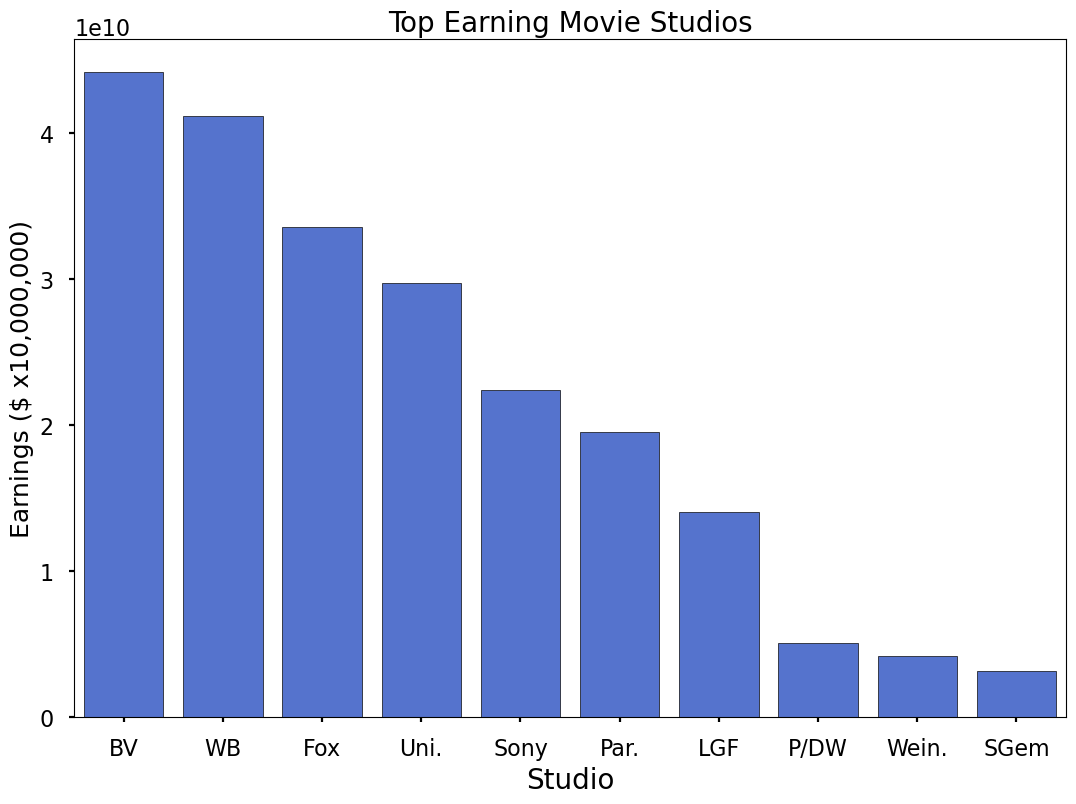

In [50]:
# Plot their total earnings.

sns.barplot(data=top_10.reset_index().head(10), x='studio', y='total_gross', color = 'royalblue', edgecolor='black')

plt.xlabel('Studio', fontsize=20)
plt.ylabel('Earnings ($ x10,000,000)', fontsize=18)
plt.title('Top Earning Movie Studios', fontsize=20)

plt.show();

The top 2 studios, Buena Vista and Warner Brothers, earn on the upside of $40,000,000,000 in an 8 year period (2010 - 2018). That is, on average, 5 billion dollars a year.

This further solidifys the fact that there is money to be made in the sector.

Of equal importance would be the earnings of each of the top studios per year over the same time period. This means grouping the data set by year then studio.

In [51]:
top_studion_earns = mojo2_df.groupby(['year','studio']).sum().sort_values('total_gross', ascending=False)
top_studion_earns

title   
year studio                                                          
2016 BV          Captain America: Civil WarRogue One: A Star Wa...  \
2018 WB          AquamanFantastic Beasts: The Crimes of Grindel...   
2017 BV          Star Wars: The Last JediBeauty and the Beast (...   
2014 Fox         X-Men: Days of Future PastDawn of the Planet o...   
2018 BV          Avengers: Infinity WarBlack PantherIncredibles...   
...                                                            ...   
2011 ALP                                                Blood Ties   
2018 Synergetic                                           The Swan   
     Grav.                                       An Actor Prepares   
2013 Vita.                                       Caught in the Web   
2015 BWP                     It's All So Quiet (Boven is het stil)   

                 domestic_gross  foreign_gross   total_gross  
year studio                                                   
2016 BV            2.871000e+09   4.393300e+09  7.264300e+09  
2018 WB            2.124600e+09   4.446200e+09  6.570800e+09  
2017 BV            2.378200e+09   3.946600e+09  6.324800e+09  
2014 Fox           1.979760e+09   3.839200e+09  5.818960e+09  
2018 BV            3.045600e+09   2.621801e+09  5.667401e+09  
...                         ...            ...           ...  
2011 ALP           2.800000e+03   0.000000e+00  2.800000e+03  
2018 Synergetic    2.400000e+03   0.000000e+00  2.400000e+03  
     Grav.         1.700000e+03   0.000000e+00  1.700000e+03  
2013 Vita.         1.100000e+03   0.000000e+00  1.100000e+03  
2015 BWP           7.000000e+02   0.000000e+00  7.000000e+02  

[712 rows x 4 columns]

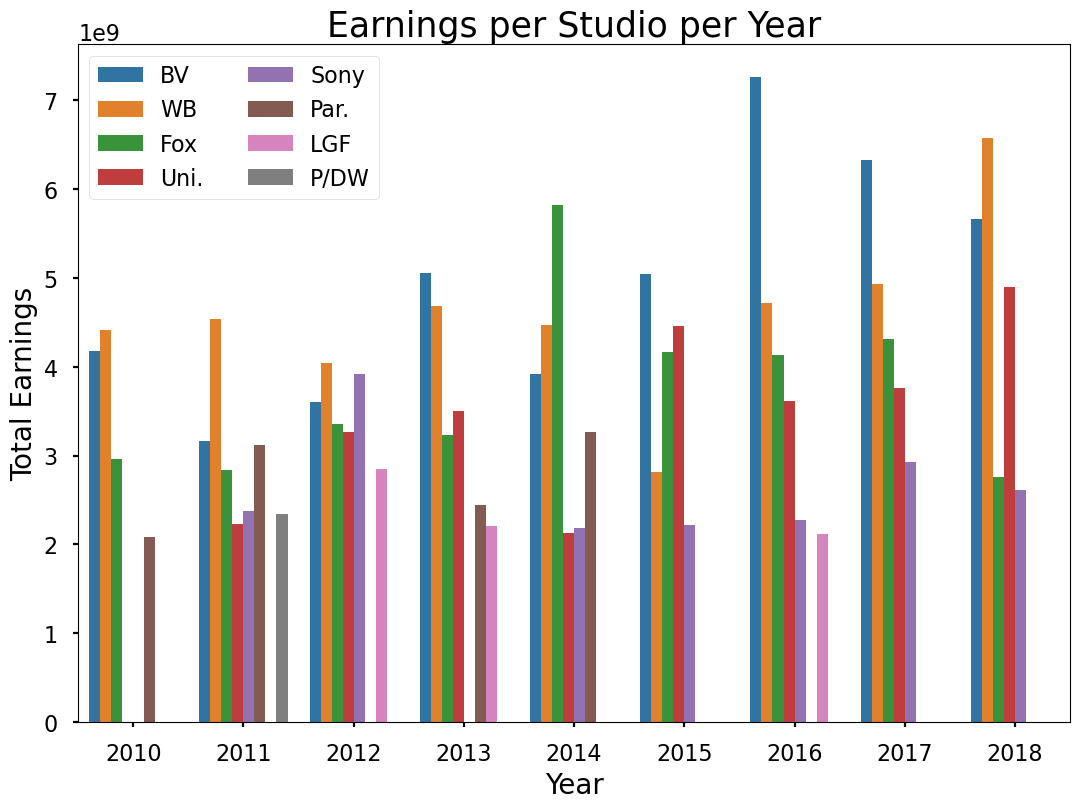

In [52]:
# Plotting

sns.barplot(x='year', y='total_gross', hue='studio', data=top_studion_earns.reset_index().head(50))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Earnings', fontsize=20)
plt.title('Earnings per Studio per Year', fontsize=25)
plt.legend(loc='upper left',ncol=2)

There is a need to work with only the top 10 studios since that is where Microsoft aims to be, thus modifying the data frame to only contain statistics of the top 10 studios.

In [53]:
# Making a list of the top studios
top_studio_df = list(top_10.reset_index()['studio'])

# Dropping all rows that don't contain a top studio
top_mojo2_df = mojo2_df[mojo2_df['studio'].isin(top_studio_df)]
top_mojo2_df

# Confirming changes
top_mojo2_df['studio'].value_counts()

studio
Fox      202
WB       185
Uni.     147
LGF      143
Sony     109
BV       106
Par.     101
Wein.     77
SGem      35
P/DW      10
Name: count, dtype: int64

Next would be to see how many movies the big studios produce in a year over an 8 year period. This helps with having a target number to work towards.

In [54]:
num_of_movies = top_mojo2_df.groupby(['year', 'studio'])['title'].count()
num_of_movies

year  studio
2010  BV        14
      Fox       25
      LGF       14
      P/DW       4
      Par.      10
                ..
2018  Par.       8
      SGem       4
      Sony      15
      Uni.      21
      WB        22
Name: title, Length: 83, dtype: int64

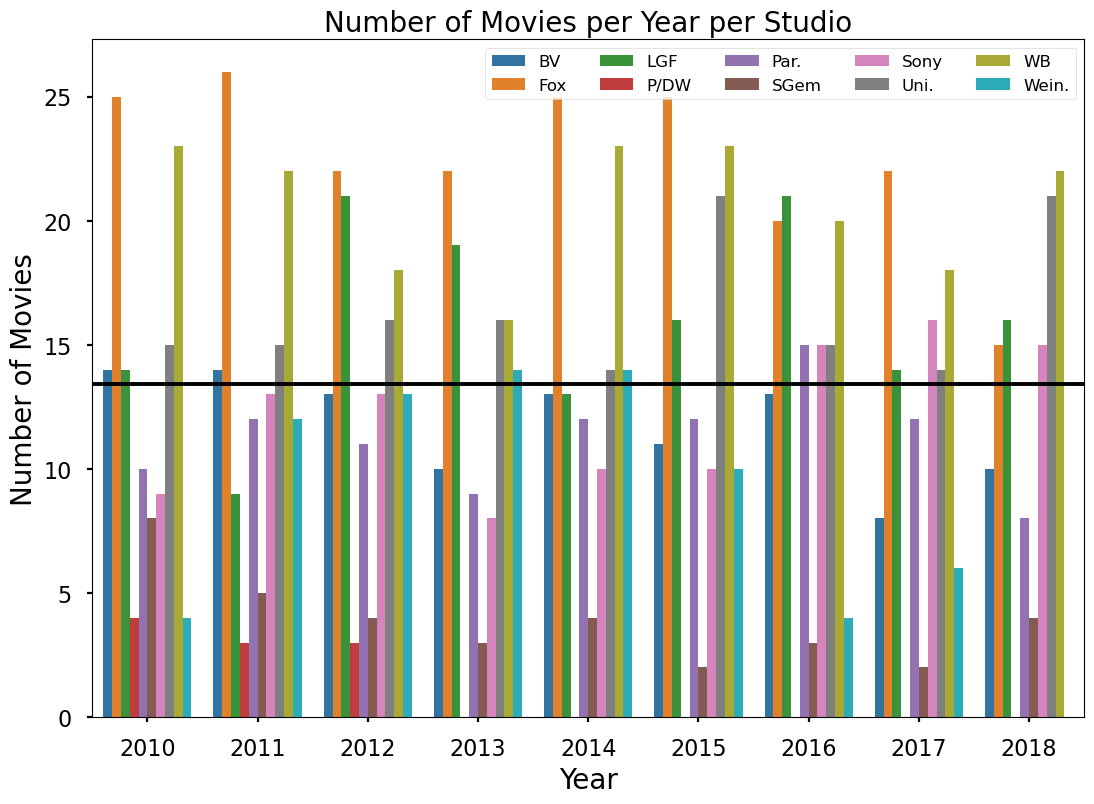

In [55]:
# Creating plot
sns.barplot(data=num_of_movies.reset_index(), x='year', y='title', hue='studio')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Movies', fontsize=20)
plt.title('Number of Movies per Year per Studio', fontsize=20)
plt.legend(loc='upper right',ncol=5,fontsize='large')

# Creating a line to show the average number of movies made
plt.axhline(y=13.433735, color='black')

On average, the big studios produce around 13 movies a year (the black line) which is what Microsoft would have to aim for.

#### Rotten Tomatoes

For Rotten Tomatoes data, the most popular genres in the last few years could be analyzed. Genre tastes may change for different generations so limiting the data once again to the new millenium since Microsoft would potentially be making movies for millenials and post-millenials.

In [56]:
# Checking the years

tomatoes_df['year'].value_counts().sort_values()

year
1961     1
1949     1
1930     1
1922     1
1936     1
        ..
2002    34
2001    35
2009    35
2000    38
2003    40
Name: count, Length: 91, dtype: int64

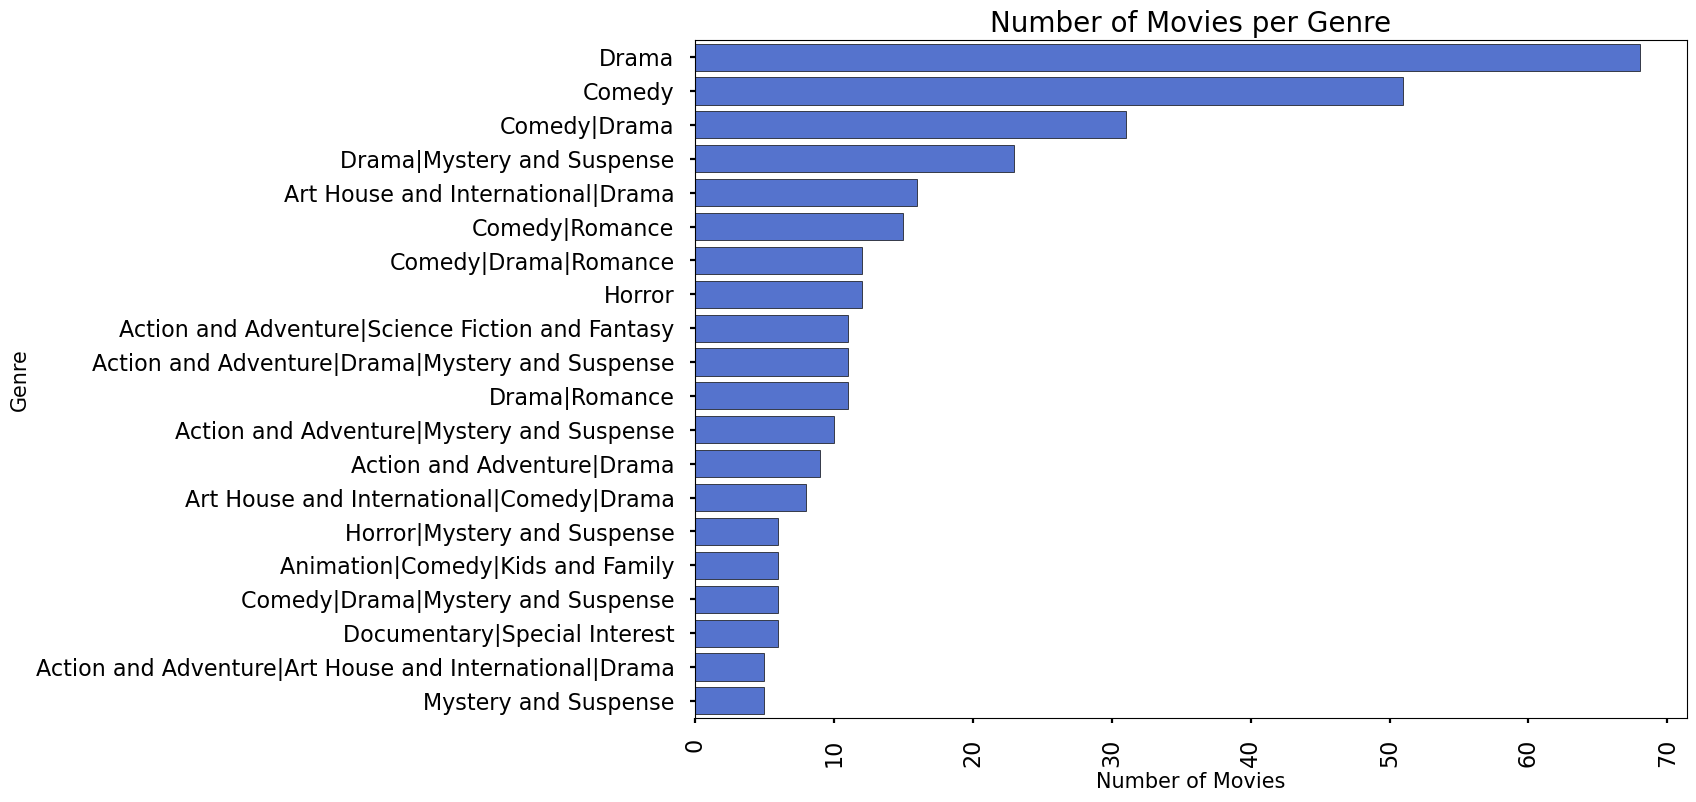

In [57]:
# Limiting the data to post-2000
tomatoes_df = tomatoes_df[tomatoes_df['year']>2000]

# Checking for the most common genres in that period
common_genre_df = tomatoes_df['genre'].value_counts()

# Limiting to the top 20 most popular genres
top_20_genre = common_genre_df.head(20)

# Plotting the most popular genres
sns.barplot(data=top_20_genre.reset_index(), x=top_20_genre.values, y=top_20_genre.index, color = 'royalblue',orient='h',edgecolor='black')

plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.title('Number of Movies per Genre', fontsize=20)
plt.xticks(rotation=90);

These are the most common genres of movies in the last 20 years. The assumption is that the more common a genre, the more popular it is.

Microsoft will have to aim for genres like drama, comedy, romance and action-adventure to be popular.

#### The Movie DB

The final data set, TheMovieDB.

In [58]:
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,day
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,26
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5,7
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11,22
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10,13
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,5,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,10,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,6,22


To start, the language that most movies are released in.

In [59]:
# Limiting to only the top 5 most common languages

languages = tmdb_df['original_language'].value_counts().head(5)
languages

original_language
en    23291
fr      507
es      455
ru      298
ja      265
Name: count, dtype: int64

We see the most common languages are: 
 * English
 * France
 * Espanol
 * Russian
 * Japanese

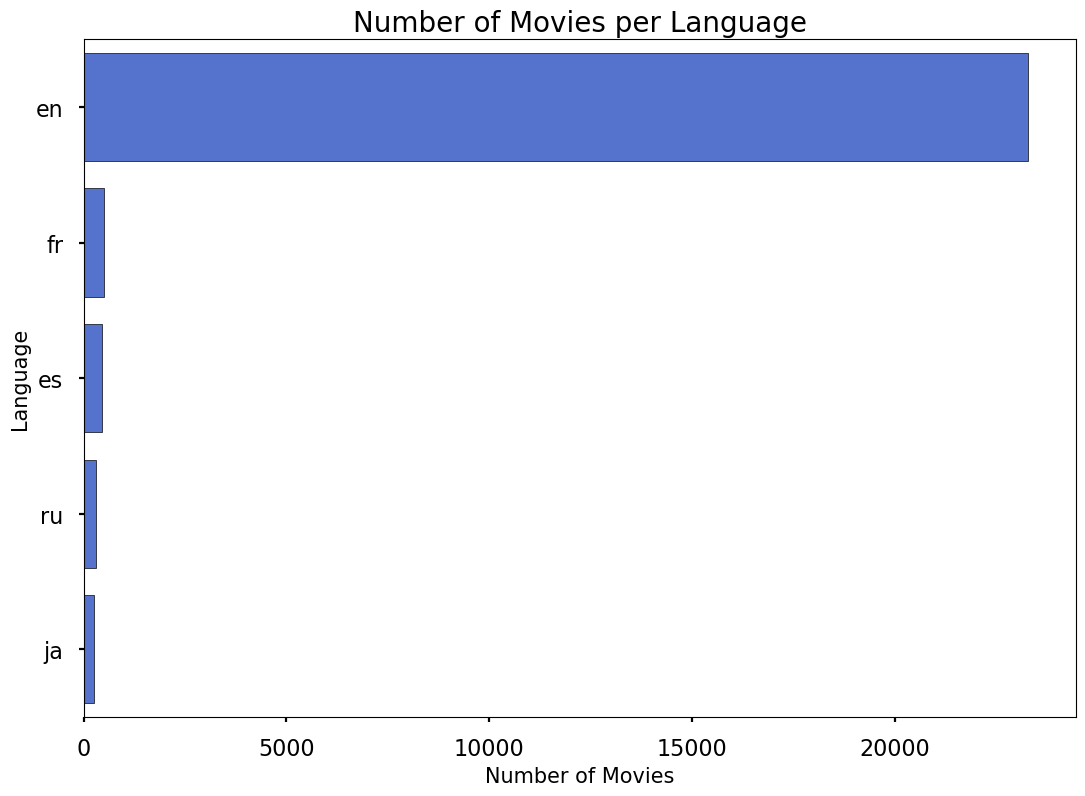

In [60]:
# Creating a plot

sns.barplot(data=languages.reset_index(), x=languages.values, y=languages.index, color = 'royalblue',orient='h',edgecolor='black')
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Language', fontsize=15)
plt.title('Number of Movies per Language', fontsize=20);

Microsoft can capitalize on the dominance of English movies while also targeting markets with underrepresented languages to increase their reach and promote inclusivity. By producing films in various languages, Microsoft can enhance its image and popularity.

Additionally, examining the relationship between a movie's release month and its popularity, measured by vote_average, is important. However, the dataset needs filtering to include only movies with a significant number of votes. Furthermore, focusing on the past 20 years will provide more relevant data.

In [61]:
# We check the statistics of the column

tmdb_df['vote_count'].describe()

count    26517.000000
mean       194.224837
std        960.961095
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64

The mean acts as a cut off point for a row's vote average to be considered.

In [62]:
# Cutting off row with less than mean, equating to a new data frame
tmdb2_df = tmdb_df[tmdb_df['vote_count'] > 195]

# Cutting off years we don't need
tmdb2_df = tmdb2_df[tmdb2_df['year'] > 2000]
tmdb2_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,day
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,26
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5,7
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7,16
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24390,24390,"[35, 10402, 10749]",426338,es,La llamada,7.471,2018-01-09,Holy Camp!,7.0,209,2018,1,9
24409,24409,"[9648, 53]",345923,en,All I See Is You,7.312,2017-10-27,All I See Is You,4.9,311,2017,10,27
24422,24422,"[35, 18]",415401,en,The Party,7.233,2018-02-16,The Party,6.4,229,2018,2,16
24462,24462,"[28, 16, 14, 12, 35, 878]",503314,ja,ドラゴンボール超スーパー ブロリー,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,2019,1,16


In [63]:
# Confirmimg changes for year column

tmdb2_df['year'].value_counts()

year
2016    365
2015    349
2017    327
2014    321
2013    273
2011    262
2018    255
2012    226
2010    225
2002      6
2004      6
2009      5
2019      5
2005      3
2008      3
2001      1
2007      1
2006      1
2003      1
Name: count, dtype: int64

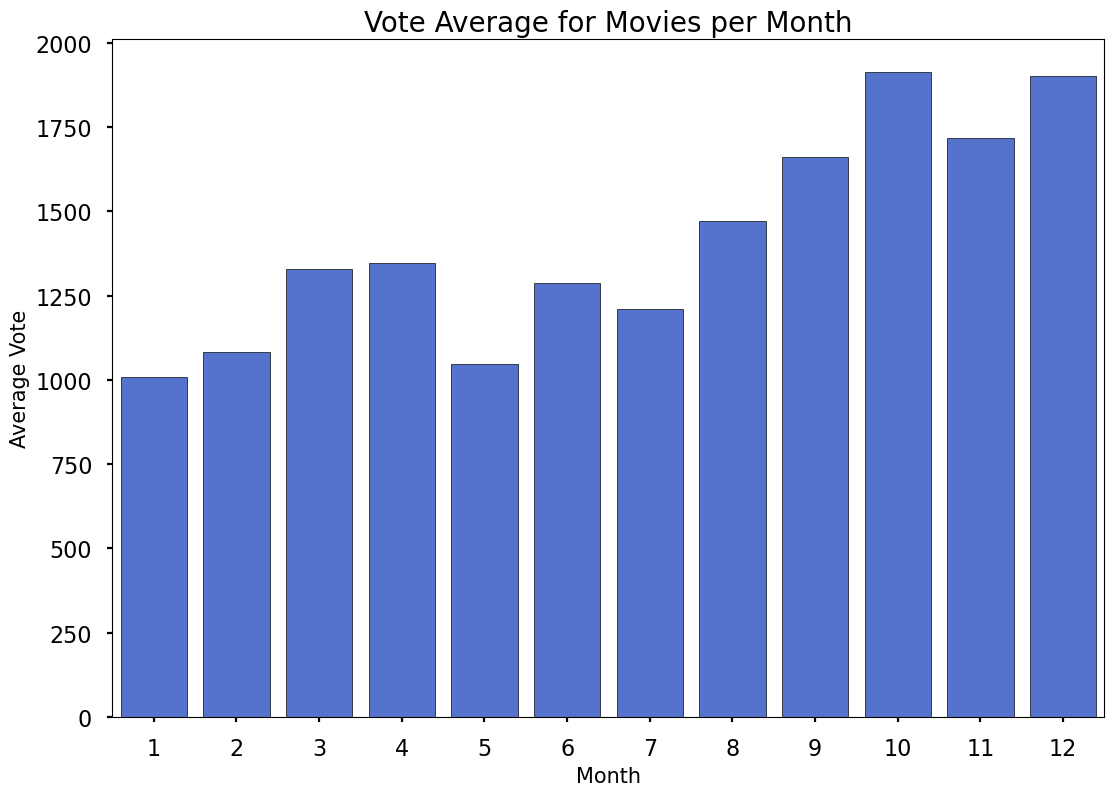

In [64]:
# month_vote_mean = df.groupby('month_of_release')['vote_average'].mean()

# sns.barplot(x='month_of_release', y='vote_average', data=month_vote_mean)

# Grouping the data by month, looking at vote average
month_vote = tmdb2_df.groupby('month')['vote_average'].sum()

# Creating plot
sns.barplot(x='month', y='vote_average',color='royalblue',edgecolor='black', data=month_vote.reset_index())

plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Vote', fontsize=15)
plt.title('Vote Average for Movies per Month', fontsize=20);

Movies released towards the end of the year tend to receive higher average ratings, potentially due to the holiday season. Utilizing this trend can increase the likelihood of a movie gaining popularity, suggesting an optimal release time.

## Conclusion

* The movie sector has significant profit potential, with an average industry profit of $22 billion and top studios earning around $5 billion annually. Microsoft could hop on this.

## Recommendation

* To make popular movies, Microsoft should produce at least 13 films per year.

* Microfost should narrow down to the following genres which are commonly preferred by audiences:
 Drama,
 Comedy,
 Drama-Mystery,
 Comedy,
 Romance,
 Horror.

* Releasing major films towards the end of the year increases the chances of higher viewer ratings.

* Conduct analysis to determine the influence of directors and actors on the success of a movie.

* Explore the correlation between a movie's production cost and its popularity.

* Identify and predict potential challenges that may arise during the movie production setup process.
